In [8]:
from PIL import Image
import numpy as np
from einops import rearrange
from src.utils.mask_v2 import Maskerv2

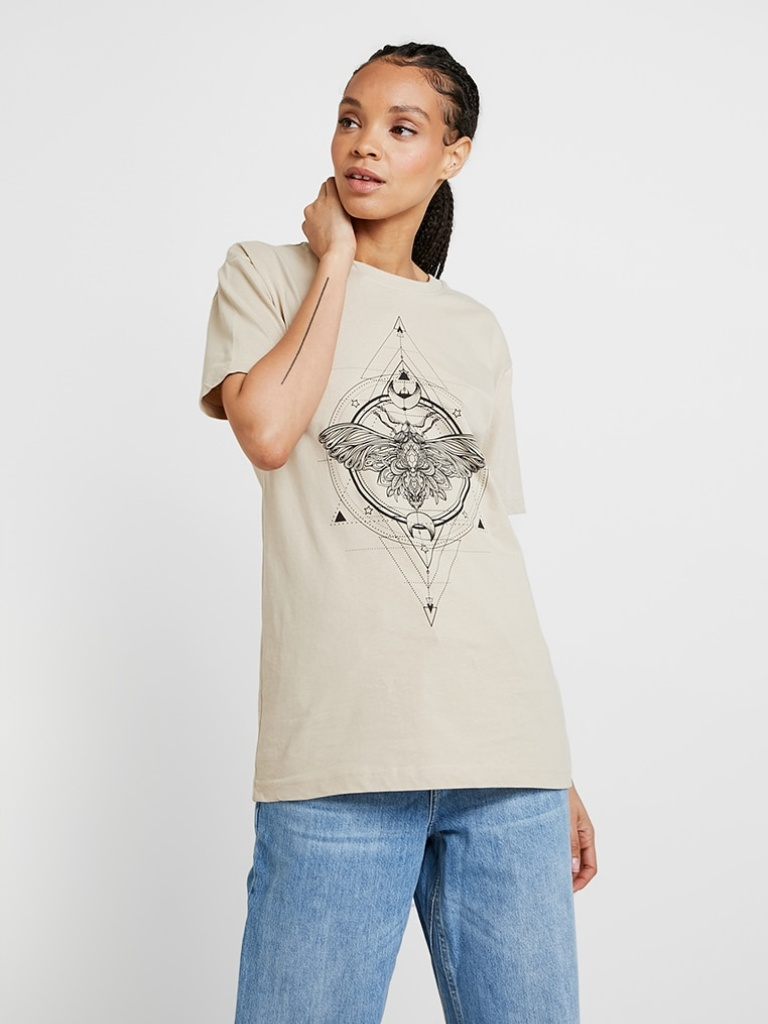

In [13]:
h, w = (1024, 768)
img = Image.open('../datasets/vitonhd/train/image/00113_00.jpg').resize((w, h))
img

100%|██████████| 1/1 [00:00<00:00,  3.64it/s]


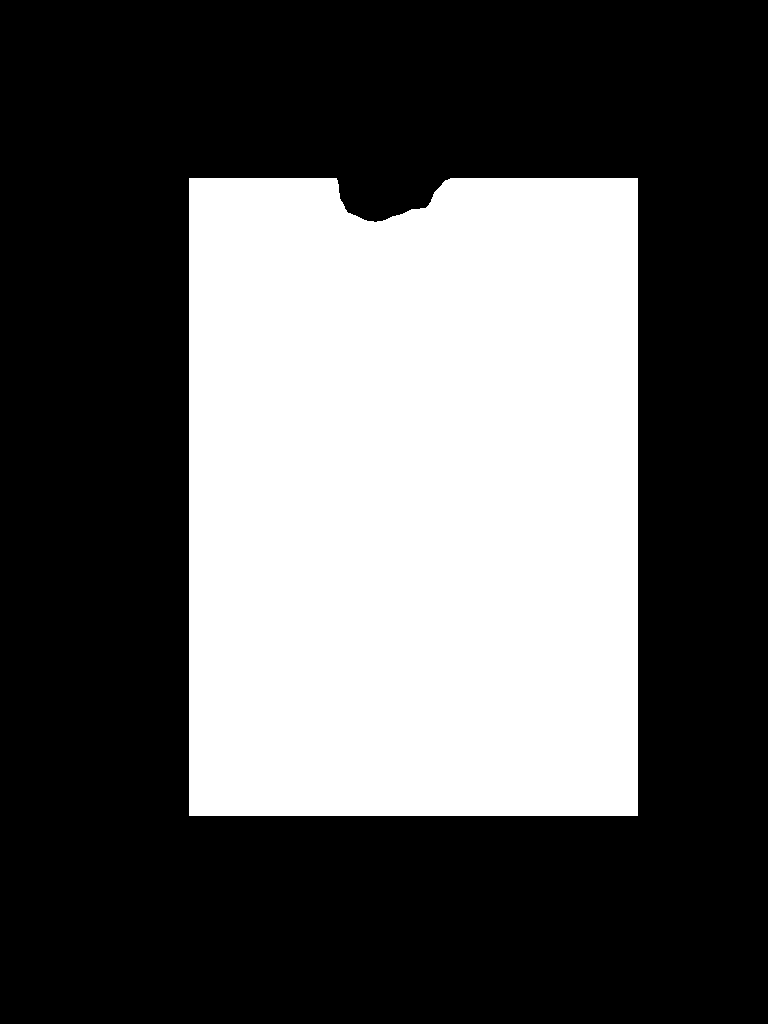

In [14]:
masker = Maskerv2()
mask = masker.create_mask(img)
mask

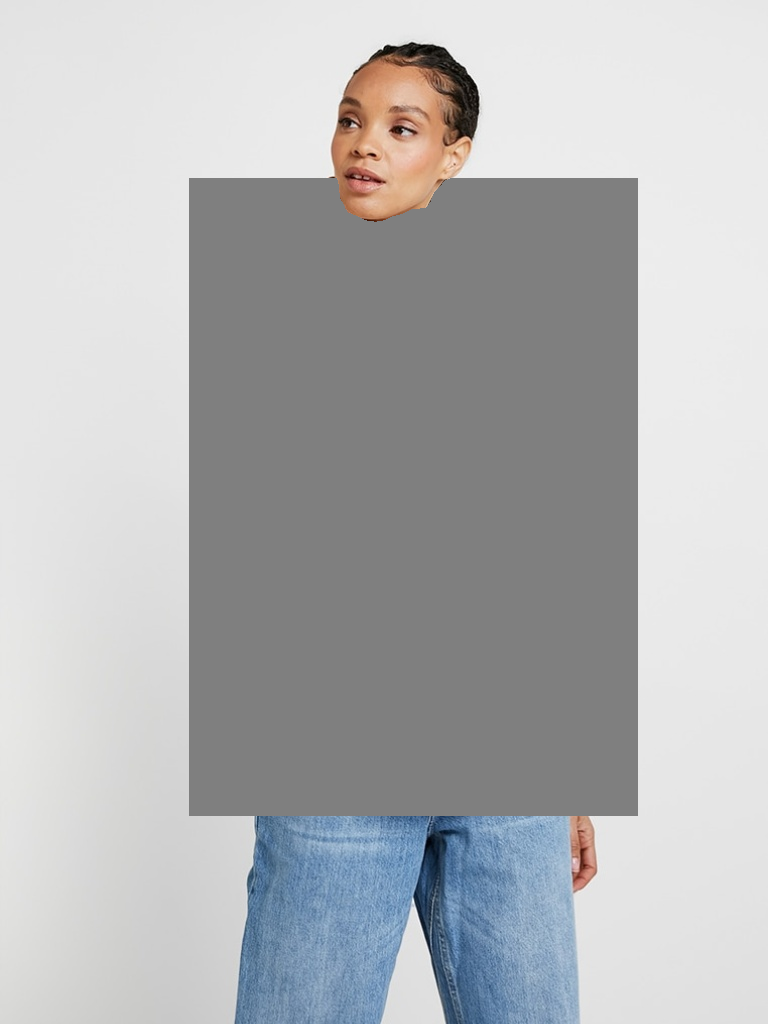

In [15]:
mask_np = np.array(mask)
mask_np = np.stack([mask_np] * 3)
mask_np = rearrange(mask_np, 'c h w -> h w c')
img_np = np.array(img)
out = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
Image.fromarray(out)

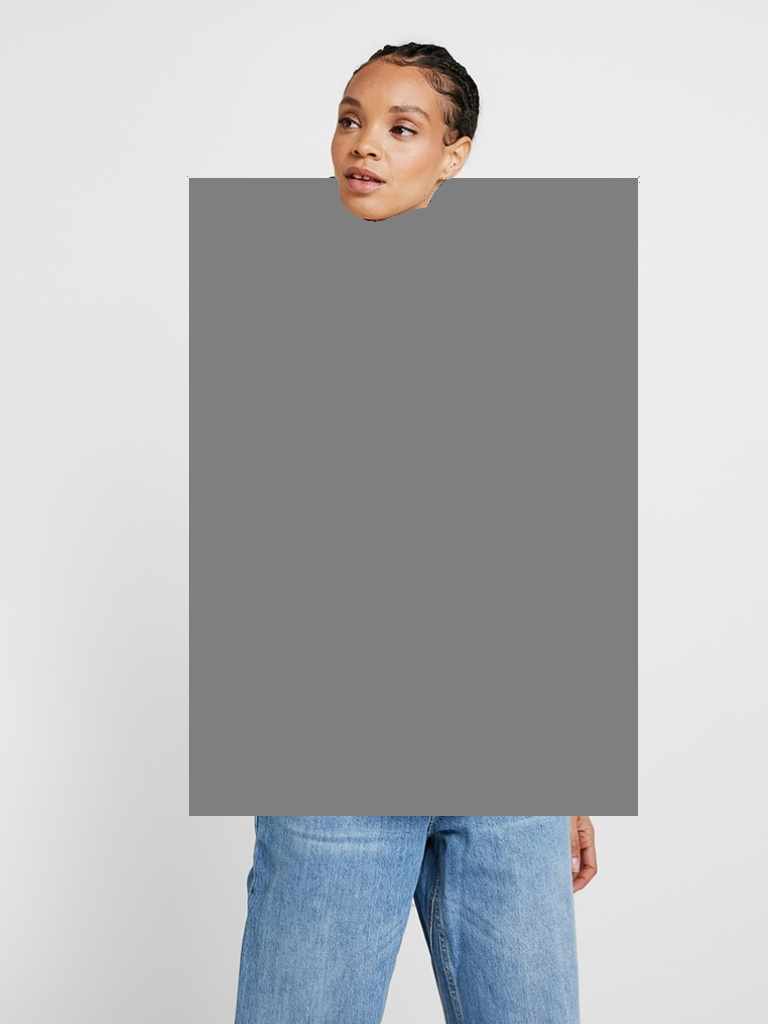

In [16]:
mask = Image.open('../datasets/vitonhd/train/agnostic-mask-v2/00113_00.jpg')

mask_np = np.array(mask)
mask_np = np.stack([mask_np] * 3)
mask_np = rearrange(mask_np, 'c h w -> h w c')
img_np = np.array(img)
masked_img_np = np.where(mask_np, np.ones_like(mask_np) * 127, img_np)
Image.fromarray(masked_img_np)

In [ ]:
# from diffusers.utils import make_image_grid

# make_image_grid([mask, Image.fromarray(out), masked_img], 1, 3)